# New Coder e-Learning Analysis

The goal of this analysis is to find a good market to advertise our data science e-learning product online. Looking at the existing data from freecoding bootcamp, we can follow the statistics of people who are actively or interested in learning online.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
#link
#https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)
pd.options.display.max_columns = 100 #to avoid truncated output
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,...,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,...,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40000.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20

The column names are pretty much self-explanatory, we are interested in advertising on platforms that are filled with data science learners

# The Questions that we want to ask

1. Where are these new coders located.
2. What locations have the greatest densities of new coders.
3. How much money they're willing to spend on learning.

In [51]:
100*survey['JobRoleInterest'].value_counts(normalize=True) #in percentage

Full-Stack Web Developer                                                                                                                                                             11.770595
  Front-End Web Developer                                                                                                                                                             6.435927
  Data Scientist                                                                                                                                                                      2.173913
Back-End Web Developer                                                                                                                                                                2.030892
  Mobile Developer                                                                                                                                                                    1.673341
Game Developer                               

Generally, people are interested to become a web developer. Specifically fullstack and Front-end. This is understandable since the web development technology has been changing rapidly, with new API's coming out every week (or even more frequently), thus leveling the playing field for newcomers. There are about ~2% of the people who are interested in learning data science stuff. Notice, there are some people who are interested in multiple categories. Let's split those even further and compare with people who are interested in a single subject.

In [52]:
filtered_interests = survey['JobRoleInterest'].dropna()
splitted_interests = filtered_interests.str.split(',')
splitted_interests.head()
#type(splitted_interests)

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [53]:
def num_cat(row):
    return len(row)

num_interests = splitted_interests.apply(num_cat)
num_interests.value_counts(normalize=True,ascending=False)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

About ~32% of people interested in 1 subject/specific subject.
This may mean that some people consider Backend + Frontend stack (web development) to be counted as 2 subjects instead of 1 (Fullstack development).
Therefore, there might be hidden factors that will contribute to errors in this. However, it plays into our data science advantages.

Text(0.5,1,'Interests Among Participants for Data Learning')

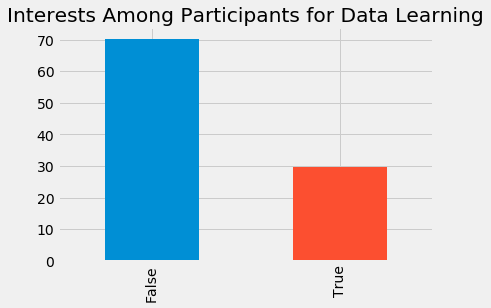

In [54]:
# Frequency table (we'll categorize data science, data analyst, or data engineer. Anything that deals with data will be group up together)
data_science = filtered_interests.str.contains(
    'Data')
data_frequency = data_science.value_counts(normalize = True) * 100
#print(freq_table)

plt.style.use('fivethirtyeight')
data_frequency.plot.bar()
plt.title("Interests Among Participants for Data Learning")

Most people are do not want to learn data-related roles in the survey. We have seen a high number of people that wants to do web development. Let's dig a little deeper to see how many people are interested.

Text(0.5,1,'Interests Among Participants for Web Dev Learning')

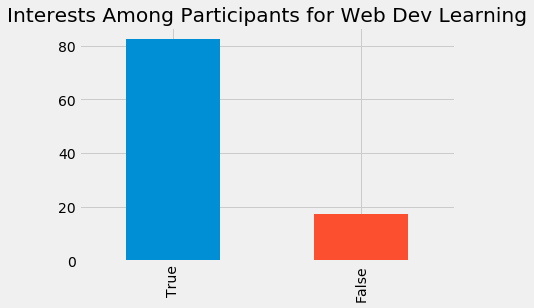

In [55]:
# Frequency table
web_frequency = filtered_interests.str.contains(
    'Web Developer')
web_frequency = web_frequency.value_counts(normalize = True) * 100
#print(freq_table)

plt.style.use('fivethirtyeight')
web_frequency.plot.bar()
plt.title("Interests Among Participants for Web Dev Learning")

This data set would provide a really good way if our interest is in web development. However, let's carry on with our analysis with our data science product in mind, however it's understood that the data set is significantly better for web development related e-learning products

# Important questions left to ask:

1. Where are the learners located
2. How much money are they willing to spend for e-learning

In [56]:
survey_filtered = survey[survey['JobRoleInterest'].notnull()].copy()
#in case we later change the inital survey df
countries_freq = survey_filtered['CountryLive'].value_counts(normalize=True,ascending=False)

In [57]:
countries_freq.head()

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

It seems that it's a no brainer to advertise in the USA, however it isn't clear between India and other countries due to currency leverages.

Now let's focus on the question of how much on average does a person from each of these countries spend on e-learning. For new subscribers with 0 months, we'll treat it as 1 month since he/she has already paid for it/at least tried the platforms

In [58]:
print((survey_filtered['MonthsProgramming'] == 0).value_counts(normalize=True))
#3% of the learners are learning in the first month, or subscribed for less than a month
survey_filtered['MonthsProgramming'].replace(0,1,inplace=True)

# New column for the amount of money each student spends each month
survey_filtered['money_per_month'] = survey_filtered['MoneyForLearning'] / survey_filtered['MonthsProgramming']
print(survey_filtered['money_per_month'].isnull().sum())

survey_filtered['money_per_month'].dropna(inplace=True)
print(survey_filtered['money_per_month'].isnull().sum())

#survey_filtered['CountryLive'].isnull().sum()
survey_filtered['CountryLive'].dropna(inplace=True)
print(survey_filtered['CountryLive'].isnull().sum())

#we've dropped people who hasn't spend money for learning, as well as people who didn't clarify which country he/she lives in

False    0.96639
True     0.03361
Name: MonthsProgramming, dtype: float64
675
0
0


In [59]:
#filtered out to the top 4 countries
top_countries = countries_freq.head(4).index.tolist()
print(top_countries)

mean_sub_price = survey_filtered.groupby('CountryLive').mean()
mean_sub_price = mean_sub_price['money_per_month'][top_countries]
print(mean_sub_price)

['United States of America', 'India', 'United Kingdom', 'Canada']
CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64


The spending for India is surprising high considered that it's still a developing country. Let's look at the variance and the median to understand better.

In [60]:
median_sub_price = survey_filtered.groupby('CountryLive').median()
median_sub_price = median_sub_price['money_per_month'][top_countries]
print(median_sub_price)

std_sub_price = survey_filtered.groupby('CountryLive').std()
std_sub_price = std_sub_price['money_per_month'][top_countries]
print(std_sub_price)

CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: money_per_month, dtype: float64
CountryLive
United States of America    1940.245614
India                        692.960378
United Kingdom               162.311836
Canada                       441.014158
Name: money_per_month, dtype: float64


It looks like most people studies for free, aside from USA, where some people do buy e-learning products.

Text(0.5,0,'Country')

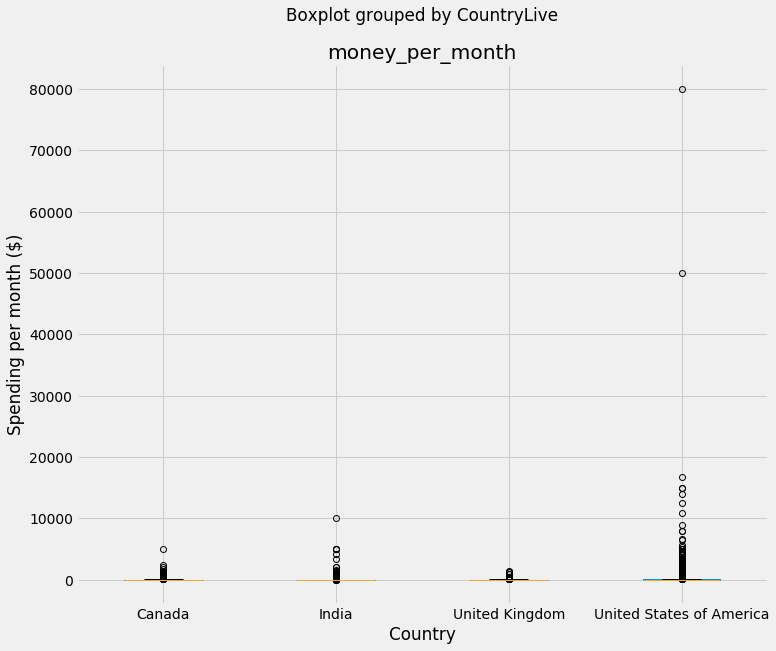

In [61]:
# Isolate only the countries of interest
survey_filtered.dropna(subset=['CountryLive'],inplace=True)
top4 = survey_filtered[survey_filtered['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

top4.boxplot('money_per_month',by='CountryLive',figsize= (12,10))
plt.ylabel('Spending per month ($)')
plt.xlabel('Country')

Spending 50k a month for e-learning doesn't seem right. Maybe it's a company? Anyway, we'll remove anything over 15k per month, as we believe that the answers are flawed.

Text(0.5,0,'Country')

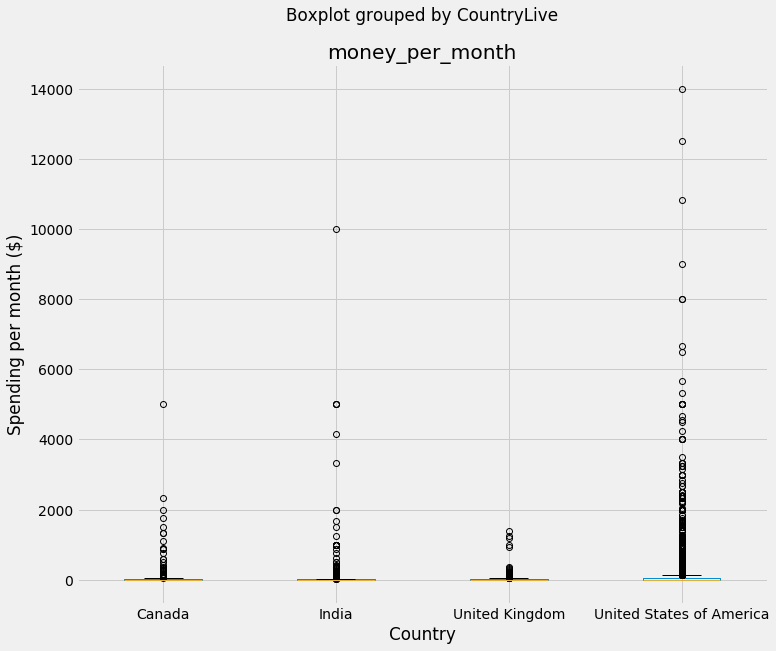

In [62]:
top4 = top4[top4['money_per_month'] < 15000]
top4.boxplot('money_per_month',by='CountryLive',figsize= (12,10))
plt.ylabel('Spending per month ($)')
plt.xlabel('Country')

CountryLive
Canada                      113.510961
India                        57.256604
United Kingdom               45.534443
United States of America    147.745932
Name: money_per_month, dtype: float64


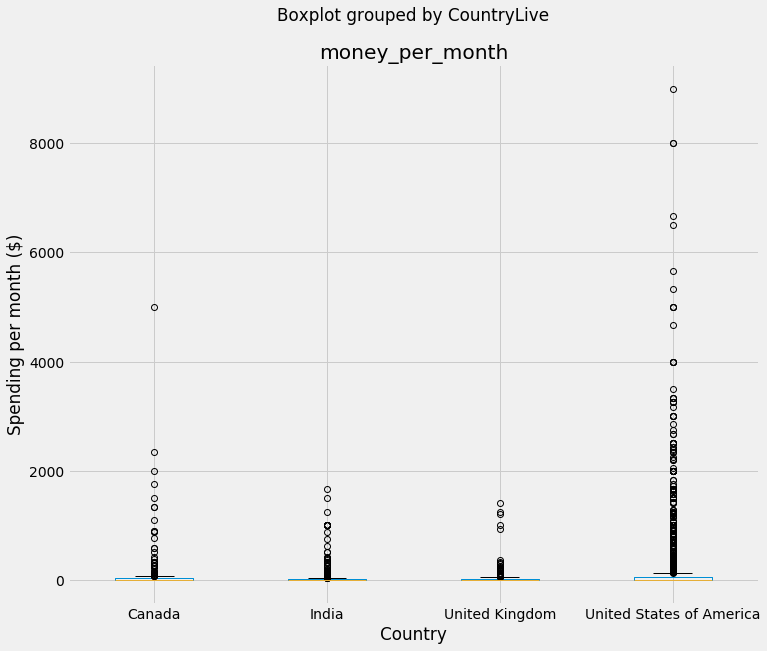

In [63]:
# Inspect the extreme outliers for India
india_outliers = top4[
    (top4['CountryLive'] == 'India') & 
    (top4['money_per_month'] >= 2000)]
india_outliers

#nothing indicates that they should be spending more than $2000 a month.
top4 = top4.drop(india_outliers.index) # using the row labels

#Inspect outliers for the rest
western_outliers = top4[(top4['AttendedBootcamp'] == 0) & (top4['money_per_month'] >4000)]
top4 = top4.drop(western_outliers.index)

top4.boxplot('money_per_month',by='CountryLive',figsize= (12,10))
plt.ylabel('Spending per month ($)')
plt.xlabel('Country')

print(top4.groupby('CountryLive').mean()['money_per_month'])

In [64]:
western_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,...,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
2480,35.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,United States of America,United States of America,education,NaN,Employed for wages,NaN,75000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,55000.0,20.0,b59fc70a3c462df047dfc252caa22b22,394887f6372285d892bb87c88efcf925,50000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Religious Studies,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,50.0,e1d790033545934fbe5bb5b60e368cd9,7cf1e41682462c42ce48029abf77d43c,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,reactivex.io/learnrx/ & jafar husain,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Biology,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
5769,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,85000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,NaN,1.0,NaN,55.0,1313f6c29b01da4348026c95ee82c62d,ea11b56e5be9ac49104f306f21efd7a2,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Music Performance,34000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
6528,37.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,60000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,20.0,0cde2a1eb5fc0e18926e1a5cf950a5c8,19d0e9e824d414b92d3ab3569fd2a180,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,bachelor's degree,Film

What happen when a person attends a bootcamp but no more than 2 months? That wouldn't be what we want to analyze. They are spending a lot of money and have a short lasting revenue spike on our product. Let's subtract them out.

Text(0.5,0,'Country')

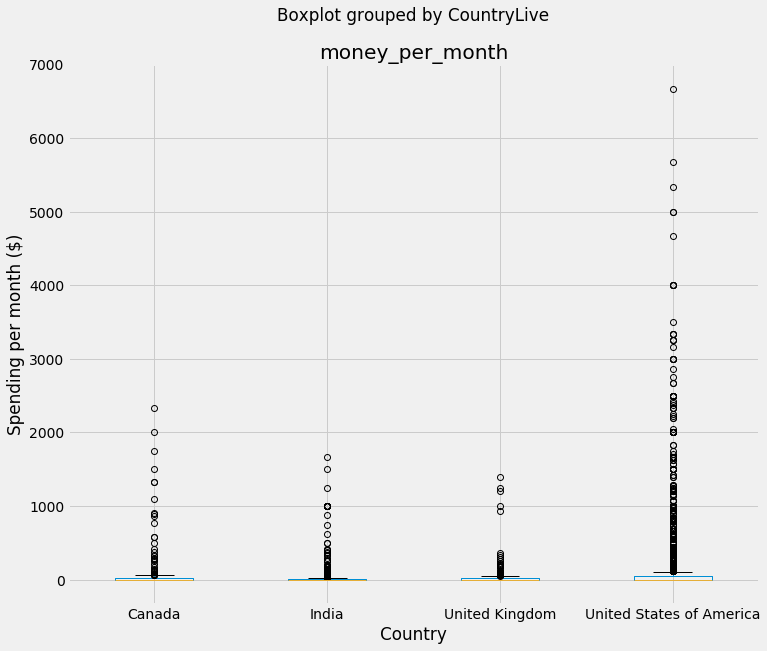

In [65]:
western_outliers2 = top4[(top4['AttendedBootcamp'] == 1) & (top4['MonthsProgramming'] < 3)]
top4 = top4.drop(western_outliers2.index)

top4.boxplot('money_per_month',by='CountryLive',figsize= (12,10))
plt.ylabel('Spending per month ($)')
plt.xlabel('Country')

In [66]:
#red-do the statistics
top4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        57.272587
United Kingdom               45.534443
United States of America    133.692085
Name: money_per_month, dtype: float64

United Kingdom seems like a place we don't want to advertise in. They are western with the average spending below Indian's. Canada's spending is doubled that of Indians, but there are way more indian students as this poll suggests. Also, it's interesting to see the the drop in Canadian money spent  per month after that "short bootcamp tryout".

There's a split in data between Indian/Canadian. Advertise in either country should be ok based on our analysis. The margin of error is probably higher than that of the predictions we've done. 

Last but not least, most of these learners are keen toward web development. It is important to understand that the same trend might not be applicable to Data since only a very small amount of survey are interested in Data Related Subject.